<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/week-11/Week%2011/Regression_Models_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

define a custom function to plot our model's learning history

In [40]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""

  metrics = history.history.keys()
  print(metrics)
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [41]:
# import data

reg_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTg36jLawSOgGP9hp0oJ3OYZiHMWbuGLiau-8DMjtcKNv7v9Zy_zFBQs9gZU-44GGeIyfXE2iwo26_z/pub?output=csv'
df = pd.read_csv(reg_url)

# drop car name columns
df = df.drop(columns="car name")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [42]:
#Looking for missing values and duplicates
print(df.info())
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.6 KB
None
0


#  Train Test Split

In [43]:
#Stating X and y
X = df.drop(columns="mpg")
y = df["mpg"]
#Performing test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Preprocessing

In [44]:
# preprocess the data
# transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# lists of columns for transformer
cat_cols = ['cylinders','model year','origin']
num_cols = X_train.columns.drop(cat_cols)
# column transformer
preprocessor = make_column_transformer((ohe, cat_cols), (scaler, num_cols))
# process the data
preprocessor.fit(X_train)
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)
X_train_proc.shape

(294, 25)

# Build and Train the Model

In [45]:
# create model architecture
input_dim = X_train_proc.shape[1]

reg_model = Sequential()

reg_model.add(Dense(10, input_dim=input_dim, activation='relu'))
reg_model.add(Dense(10, activation='relu'))
reg_model.add(Dense(1, activation='linear'))

reg_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                260       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


# Metrics

In [46]:
# compile model with additional metrics
reg_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

In [47]:
#Using verbose to suppress the output
history = reg_model.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=100,
                        verbose=0)

# Plot

dict_keys(['loss', 'mean_absolute_error', 'root_mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_root_mean_squared_error'])


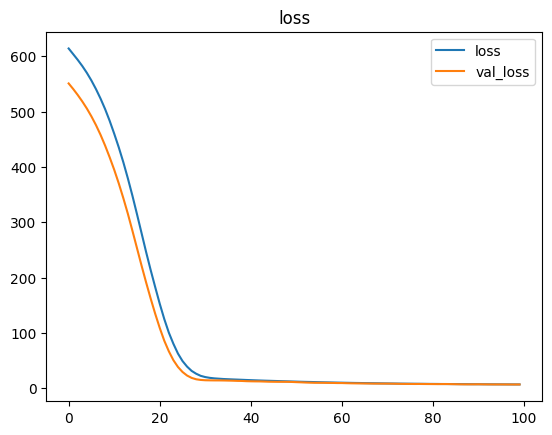

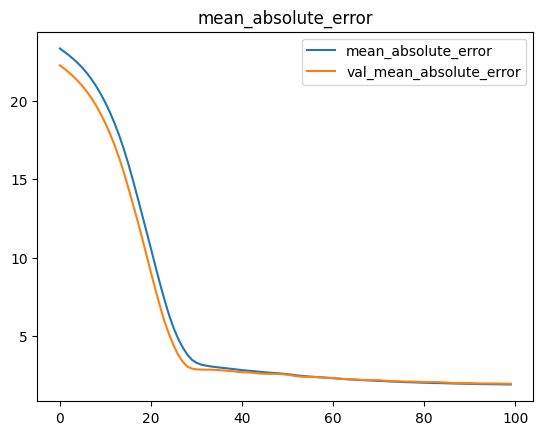

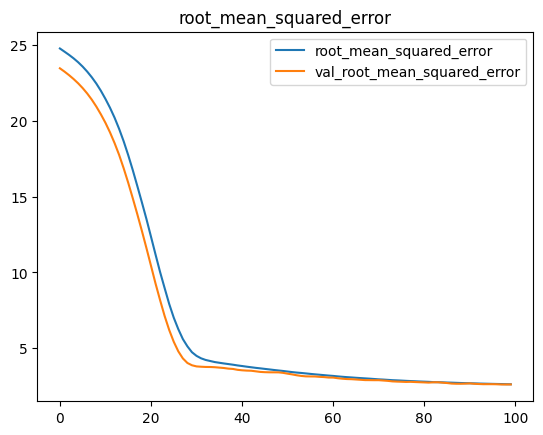

In [49]:
plot_history(history);

# Evaluating a final regression model in Keras

In [50]:
test_preds = reg_model.predict(X_test_proc)
print(f"final RSME: {np.sqrt(mean_squared_error(y_test, test_preds))}")
print(f"final MAE: {mean_absolute_error(y_test, test_preds)}")
print(f"final R2: {r2_score(y_test, test_preds)}")

4/4 [==============================] - 0s 8ms/step
final RSME: 2.603587364069771
final MAE: 1.9646038288972816
final R2: 0.8655909409392133
